# 앙상블(Ensemble) 2 - AdaBoost, GBM

## 앙상블 학습 개요

In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# GridSearchCV를 위한 사전 셋업
grid_learn = [0.0001, 0.001, 0.01, 0.03, 0.05, 0.1, 0.2, 0.25, 0.5, 1.0]
grid_n_estimator = [10, 50, 100, 300, 500]
grid_ratio = [0.1, 0.25, 0.5, 0.75, 1.0]
grid_max_features = [0.3, 0.5, 0.7, 1.0]
grid_max_depth = [1, 2, 4, 8]
grid_min_samples_leaf = [1, 2, 3, 10, 100, 1500]
grid_min_samples_split = [2, 4, 8, 16, 24, 30]
grid_seed = [0]

# 부스팅:  GBM(Gradient Boosting Machine)

* 그래디언트 부스팅의 매개변수

In [3]:
from sklearn.ensemble import GradientBoostingClassifier

?GradientBoostingClassifier  # ? 쓰면 정보 나옴

Init signature:
GradientBoostingClassifier(
    *,
    loss='log_loss',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    init=None,
    random_state=None,
    max_features=None,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0,
)
Docstring:     
Gradient Boosting for classification.

This algorithm builds an additive model in a forward stage-wise fashion; it
allows for the optimization of arbitrary differentiable loss functions. In
each stage ``n_classes_`` regression trees are fit on the negative gradient
of the loss function, e.g. binary or multiclass log loss. Binary
classification is a special case where only a single regression tree is
induced.

:class:`sklearn.ensemble.HistGradientBoostingClassifier` i

# AdaBoost : 타이타닉


In [6]:
# 타이타닉 df를 adaboosting
df = pd.read_csv('data/df_titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1043 entries, 0 to 1042
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1043 non-null   int64  
 1   Age       1043 non-null   float64
 2   SibSp     1043 non-null   int64  
 3   Parch     1043 non-null   int64  
 4   Fare      1043 non-null   float64
 5   Pclass_2  1043 non-null   int64  
 6   Pclass_3  1043 non-null   int64  
 7   Sex_1     1043 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 65.3 KB


In [7]:
X = df.iloc[:,1:]
y = df.Survived

In [8]:
# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train.shape, X_test.shape

((834, 7), (209, 7))

In [16]:
# Conduct ADA boost Original Model - without hyperparameters
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42, max_depth=1)
ada_clf = AdaBoostClassifier(dt, n_estimators=50, algorithm='SAMME.R', learning_rate=1)
ada_clf.fit(X_train, y_train)

# accuracy score method 1
print(f'train_score: {ada_clf.score(X_train, y_train)}')
print(f'test_score: {ada_clf.score(X_test, y_test)}')

# accuracy score method 2
y_pred_train = ada_clf.predict(X_train)
y_pred_test = ada_clf.predict(X_test)
train_score2 = accuracy_score(y_train, y_pred_train)
test_score2 = accuracy_score(y_test, y_pred_test)
print(train_score2, test_score2)

train_score: 0.8693045563549161
test_score: 0.8660287081339713
0.8693045563549161 0.8660287081339713


#### 하이퍼 파라미터
- 디폴트(default) 설정

```python
AdaBoostClassifier(
    base_estimator=None,
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=None,
)
```
- base_estimator: 예측할 모델, 디폴트는 DecisionTreeClassifier(max_depth=1)
- n_estimators: 모형(week learner)의 갯수, 순차적으로 오류를 보정해서 수가 많으면 성능이 일정 수준까지 높아 질 수 있으나 수행 시간이 오래 걸린다는 단점이 있음. 디폴트는 50
- learning_rate: 학습률, 0~1 사이의 값을 지정. 너무 작은 값인 경우 최소점을 찾아 예측 성능이 높지만 학습에 오래 걸리고 너무 큰 값인 경우 최소점을 찾지 못해 예측 성능이 떨어질 확률이 높음. 그래서 n_estimators와 상호 호환 필요. 디폴트는 1.0

In [17]:
?AdaBoostClassifier

Init signature:
AdaBoostClassifier(
    estimator=None,
    *,
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=None,
    base_estimator='deprecated',
)
Docstring:     
An AdaBoost classifier.

An AdaBoost [1] classifier is a meta-estimator that begins by fitting a
classifier on the original dataset and then fits additional copies of the
classifier on the same dataset but where the weights of incorrectly
classified instances are adjusted such that subsequent classifiers focus
more on difficult cases.

This class implements the algorithm known as AdaBoost-SAMME [2].

Read more in the :ref:`User Guide <adaboost>`.

.. versionadded:: 0.14

Parameters
----------
estimator : object, default=None
    The base estimator from which the boosted ensemble is built.
    Support for sample weighting is required, as well as proper
    ``classes_`` and ``n_classes_`` attributes. If ``None``, then
    the base estimator is :class:`~sklearn.tree.DecisionTreeClassifi

#### AdaBoost - GridSearchCV 를 활용한 최적의 파라미터 찾기

In [21]:
params = {
    'n_estimators': [10, 30, 50, 100, 200, 300],
    'learning_rate': np.arange(0.01, 1, 0.01), #The 'learning_rate' parameter of AdaBoostClassifier must be a float in the range (0.0, inf). Got 0.0 instead.
}
ada_basic = AdaBoostClassifier(random_state=1)
grid = GridSearchCV(ada_basic, param_grid=params, n_jobs=-1, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1), n_jobs=-1,
             param_grid={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
                         'n_estimators': [10, 30, 50, 100, 200, 300]},
             scoring='accuracy')

In [22]:
grid.best_estimator_

AdaBoostClassifier(learning_rate=0.67, n_estimators=10, random_state=1)

In [23]:
grid.best_params_

{'learning_rate': 0.67, 'n_estimators': 10}

In [24]:
grid.best_score_

0.850119039030373

In [28]:
pd.DataFrame(grid.cv_results_).sort_values('rank_test_score').head()  # cross validation 한 결과

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
396,0.013809,0.003435,0.003262,0.002726,0.67,10,"{'learning_rate': 0.67, 'n_estimators': 10}",0.826347,0.838323,0.886228,0.850299,0.849398,0.850119,0.020043,1
402,0.021368,0.004159,0.002132,0.000504,0.68,10,"{'learning_rate': 0.68, 'n_estimators': 10}",0.826347,0.838323,0.886228,0.850299,0.849398,0.850119,0.020043,1
408,0.017185,0.004682,0.002960,0.001935,0.69,10,"{'learning_rate': 0.6900000000000001, 'n_estim...",0.826347,0.838323,0.886228,0.850299,0.849398,0.850119,0.020043,1
414,0.014480,0.004085,0.003612,0.003659,0.7,10,"{'learning_rate': 0.7000000000000001, 'n_estim...",0.826347,0.838323,0.886228,0.850299,0.849398,0.850119,0.020043,1
420,0.016559,0.005484,0.002361,0.001163,0.71,10,"{'learning_rate': 0.7100000000000001, 'n_estim...",0.826347,0.838323,0.886228,0.850299,0.849398,0.850119,0.020043,1


In [29]:
best_ada = grid.best_estimator_
# evaluate the best model
print(f'train_score = {best_ada.score(X_train, y_train)}')
print(f'test_score = {best_ada.score(X_test, y_test)}')

train_score = 0.8537170263788969
test_score = 0.8803827751196173


In [35]:
# feature importance
print(best_ada.feature_importances_)
print(X.columns)

f_importance = pd.Series(best_ada.feature_importances_, index=X.columns).sort_values(ascending=False)
f_importance

[0.1 0.2 0.1 0.2 0.  0.1 0.3]
Index(['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_1'], dtype='object')


Sex_1       0.3
SibSp       0.2
Fare        0.2
Age         0.1
Parch       0.1
Pclass_3    0.1
Pclass_2    0.0
dtype: float64

<Axes: >

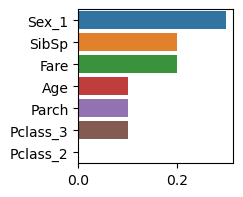

In [36]:
plt.figure(figsize=(2,2))
sns.barplot(x=f_importance.values, y=f_importance.index)

# ※ GradientBoost

# 1) 그래디언트 부스팅 with 타이타닉 Df

#### 하이퍼 파라미터
- 디폴트(default) 설정

```python
GradientBoostingClassifier(
    loss='deviance',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    init=None,
    random_state=None,
    max_features=None,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    presort='auto',
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
)
```
- loss: 손실 함수(loss function), 디폴트는 'deviance'
- base_estimator: 예측할 모델, 디폴트는 DecisionTreeClassifier(max_depth=1)
- n_estimators: 모형(week learner)의 갯수, 순차적으로 오류를 보정해서 수가 많으면 성능이 일정 수준까지 높아 질 수 있으나 수행 시간이 오래 걸린다는 단점이 있음. 디폴트는 100
- learning_rate: 학습률, 0~1 사이의 값을 지정. 너무 작은 값인 경우 최소점을 찾아 예측 성능이 높지만 학습에 오래 걸리고 너무 큰 값인 경우 최소점을 찾지 못해 예측 성능이 떨어질 확률이 높음. 그래서 n_estimators와 상호 호환 필요. 디폴트는 0.1
- min_samples_leaf: 말단 리프 노드의 최소한의 샘플 데이터 수, 디폴트 1
- max_depth: 트리의 최대 깊이, 디폴트 3
- subsample: n_estimator 모형(week learner)이 학습에 사용하는 데이터의 샘플링 비율, 디폴트 1.0

#### GradientBoost - GridSearchCV 를 활용한 최적의 파라미터 찾기

-------------------------------------------------------------------------------------------------

# 2) 그래디언트 부스팅 with 사용자 행동 인식 데이터 세트

-----------------------------------------------------------------------------------

## 실습] 와인데이터셋 - 그래디언트 부스팅 분류 -> 점수->튜닝-> 점수-> 피처 시각화

# [실습] 대출 상환 데이터를 이용하여 결정 트리, 랜덤 포레스트, 에이다부스트, 그래디언트 부스트 모델을 차례로 구축하고 성능을 평가하라